<a href="https://colab.research.google.com/github/Tenntucky/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Kole_Goldsberry_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy import stats

In [13]:
col_headers = ['Class Name', 'handicapped-infants',
            'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
            'physician-fee-freeze', 'el-salvador-aid',
            'religious-groups-in-schools', 'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras', 'mx-missile', 'immigration',
            'synfuels-corporation-cutback', 'education-spending',
            'superfund-right-to-sue', 'crime', 'duty-free-exports', 
            'export-administration-act-south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=col_headers)
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace('?', np.nan)
df = df.replace('y', 1)
df = df.replace('n', 0)

In [30]:
df_r = df[df['Class Name'] == 'republican']
df_r = df_r.dropna()
df_d = df[df['Class Name'] == 'democrat']
df_d = df_d.dropna()
df_d.head(2)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return(mean, mean - interval, mean + interval)

In [0]:
# Going to make a confidence interval for two categories for both republicans
# and democrats. One will be near 0.5 mean and a favorable vote.

In [33]:
d_16 = df_d['export-administration-act-south-africa']
export_confidence = confidence_interval(d_16)
print(export_confidence)

(0.9435483870967742, 0.9023566825660085, 0.98474009162754)


In [34]:
d_12 = df_d['education-spending']
education_confidence = confidence_interval(d_12)
print(education_confidence)

(0.12903225806451613, 0.06919940918552969, 0.18886510694350256)


In [35]:
r_12 = df_r['education-spending']
r_education_confidence = confidence_interval(r_12)
print(r_education_confidence)

(0.8518518518518519, 0.7837708549420166, 0.9199328487616871)


In [38]:
r_11 = df_r['synfuels-corporation-cutback']
synfuels_confidence = confidence_interval(r_11)
print(synfuels_confidence)

(0.1574074074074074, 0.08761355698812177, 0.22720125782669304)


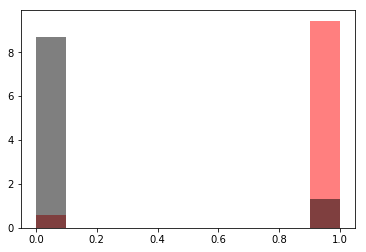

In [46]:
# Confidence intervals for democrats
plt.hist(d_16, alpha=0.5, color='red', density=True)
plt.hist(d_12, alpha=0.5, color='black', density=True);

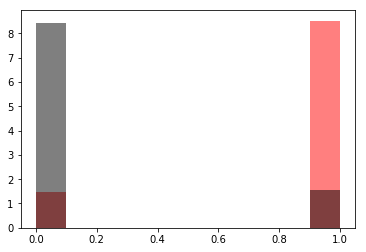

In [47]:
# Confidence intervals for republicans
plt.hist(r_12, alpha=0.5, color='red', density=True)
plt.hist(r_11, alpha=0.5, color='black', density=True);

In [0]:
# The data shows that the votes lie within the interval. 
# I read that as the data confirms the votes we got and suggests 
# that we are in the right area. 

In [62]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
print(df2.shape)
df2.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
df2['education'].value_counts()

13    10501
14     7291
17     5355
19     1723
15     1382
11     1175
16     1067
10      933
8       646
18      576
9       514
12      433
20      413
6       333
4       168
0        51
Name: education, dtype: int64

In [71]:
df2['education'] = df2['education'].replace('HS-grad', 13)
df2['education'] = df2['education'].replace('Some-college', 14)
df2['education'] = df2['education'].replace('Bachelors', 17)
df2['education'] = df2['education'].replace('Masters', 19)
df2['education'] = df2['education'].replace('Assoc-voc', 15)
df2['education'] = df2['education'].replace('Assoc-acdm', 16)
df2['education'] = df2['education'].replace('10th', 10)
df2['education'] = df2['education'].replace('7th-8th', 8)
df2['education'] = df2['education'].replace('Prof-school', 18)
df2['education'] = df2['education'].replace('9th', 9)
df2['education'] = df2['education'].replace(' 11th', 11)
df2['education'] = df2['education'].replace('12th', 12)
df2['education'] = df2['education'].replace('Doctorate', 20)
df2['education'] = df2['education'].replace('5th-6th', 6)
df2['education'] = df2['education'].replace('1st-4th', 4)
df2['education'] = df2['education'].replace('Preschool', 0)
df2['education'] = df2['education'].astype(int)
df2['education'].dtype

dtype('int64')

In [73]:
cut_points = [0, 6, 12, 13, 14, 16, 17, 19, 20]
label_names = ['Pre - 6th', '7th - 12th', 'HS-grad', 'Some College', 'Associates', 'Bachelors', 'Prof-school - Masters', 'Doctorate']
df2['education_categories'] = pd.cut(df2['education'], cut_points, labels=label_names)
df2['education_categories'].value_counts()

HS-grad                  10501
Some College              7291
Bachelors                 5355
7th - 12th                3701
Associates                2449
Prof-school - Masters     2299
Pre - 6th                  501
Doctorate                  413
Name: education_categories, dtype: int64

In [75]:
df2['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [78]:
df2 = df2.sort_values(by='education_categories')
contingency_table = pd.crosstab(df2['sex'], df2['education_categories'], margins=True)
contingency_table

education_categories,Pre - 6th,7th - 12th,HS-grad,Some College,Associates,Bachelors,Prof-school - Masters,Doctorate,All
sex,,,,,,,,,
Female,130,1175,3390,2806,921,1619,628,86,10755
Male,371,2526,7111,4485,1528,3736,1671,327,21755
All,501,3701,10501,7291,2449,5355,2299,413,32510


In [98]:
row_sums = contingency_table.iloc[0:2, 8].values
col_sums = contingency_table.iloc[2, 0:8].values
print(row_sums)
print(col_sums)

[10755 21755]
[  501  3701 10501  7291  2449  5355  2299   413]


In [99]:
total = contingency_table.loc['All','All']
total

32510

In [100]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 8)
[[ 165.74146416 1224.36957859 3473.95432175 2412.01799446  810.18132882
  1771.54798524  760.55813596  136.62919102]
 [ 335.25853584 2476.63042141 7027.04567825 4878.98200554 1638.81867118
  3583.45201476 1538.44186404  276.37080898]]


In [101]:
observed = pd.crosstab(df2['sex'], df2['education_categories']).values
print(observed.shape)
observed

(2, 8)


array([[ 130, 1175, 3390, 2806,  921, 1619,  628,   86],
       [ 371, 2526, 7111, 4485, 1528, 3736, 1671,  327]])

In [102]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

218.5355357942642

In [103]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

218.5355357942642 1.3496581142037936e-43 7 [[ 165.74146416 1224.36957859 3473.95432175 2412.01799446  810.18132882
  1771.54798524  760.55813596  136.62919102]
 [ 335.25853584 2476.63042141 7027.04567825 4878.98200554 1638.81867118
  3583.45201476 1538.44186404  276.37080898]]


In [0]:
# Does this mean that Sex and level of education have an association between them?

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)